# DS2500 Final Project: Assessing Why Americans Don't Vote
## Team 19
- Lucia Barrera: (barrera.l@northeastern.edu)
- Melina Yang: (yang.meli@northeastern.edu)
- Aaron Soice: (soice.a@northeastern.edu)

## Appendix — Hyperparameter Tuning
This file contains some processes which are very computationaly intensive. The results found from the tuning done in this notebook can be found as a graph in the main report.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nonvoters_data.csv')

In [3]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
num_df = df[numeric_cols].copy()

In [4]:
#We can also one hot encode a lot of the catagroicals we previously ignored
cats = ['educ', 'race', 'gender','income_cat']
#Note, duplicate column names seem to mess with the scaling function--so we handel the second
#yes/ no question manually
for col in cats: 
    dummie = pd.get_dummies(df[f'{col}'])
    num_df = pd.concat([num_df, dummie], axis=1)
    
#we will keep our target column intact.
num_df = pd.concat([num_df, df['voter_category']], axis=1)

In [5]:
num_df = num_df.drop('RespId', axis = 1)
num_df = num_df.drop('weight', axis = 1)

In [6]:
num_df = num_df.dropna(axis=1)

In [7]:
num_df.head()

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,...,Hispanic,Other/Mixed,White,Female,Male,$125k or more,$40-75k,$75-125k,Less than $40k,voter_category
0,1,1,1,2,4,1,4,2,2,4,...,0,0,1,1,0,0,0,1,0,always
1,1,1,2,2,3,1,1,2,1,1,...,0,0,1,1,0,1,0,0,0,always
2,1,1,1,2,2,1,1,2,1,4,...,0,0,1,0,1,1,0,0,0,sporadic
3,1,1,1,1,3,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,sporadic
4,1,1,1,-1,1,1,1,1,1,1,...,0,0,1,0,1,0,1,0,0,always


In [8]:
#list(num_df.columns)[0:103]

In [9]:
clean_columns = num_df.columns.to_list()
x_feat_list = clean_columns[0:103]

x = num_df.loc[:, x_feat_list].values
y = num_df.loc[:, 'voter_category']

In [10]:
x

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 2, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 2, ..., 0, 0, 0],
       [1, 2, 2, ..., 0, 0, 1],
       [1, 1, 3, ..., 0, 0, 1]])

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=1000)

clf.fit(x,y)

LogisticRegression(max_iter=1000)

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=10)
scores.mean()

/Users/aaronsoice/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.588055992856975

Remark: this is pretty bad...

- Let's try fixing the scale of the data?

In [13]:
df_scaled = pd.DataFrame()
for feat in x_feat_list:
    df_scaled[f'{feat}'] = round(num_df[feat] / num_df[feat].std(),4)

/var/folders/48/17g34vfn0zx8xptnzvcd0tph0000gn/T/ipykernel_43953/757934747.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled[f'{feat}'] = round(num_df[feat] / num_df[feat].std(),4)
/var/folders/48/17g34vfn0zx8xptnzvcd0tph0000gn/T/ipykernel_43953/757934747.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled[f'{feat}'] = round(num_df[feat] / num_df[feat].std(),4)
/var/folders/48/17g34vfn0zx8xptnzvcd0tph0000gn/T/ipykernel_43953/757934747.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [14]:
df_scaled.head()

,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,...,Black,Hispanic,Other/Mixed,White,Female,Male,$125k or more,$40-75k,$75-125k,Less than $40k
0,inf,1.5146,1.1543,2.6118,3.6650,1.5965,3.9544,2.4749,2.9636,3.2128,...,0.0000,0.0,0.0,2.0778,1.9999,0.0000,0.0000,0.0000,2.2295,0.0
1,inf,1.5146,2.3085,2.6118,2.7488,1.5965,0.9886,2.4749,1.4818,0.8032,...,0.0000,0.0,0.0,2.0778,1.9999,0.0000,2.3451,0.0000,0.0000,0.0
2,inf,1.5146,1.1543,2.6118,1.8325,1.5965,0.9886,2.4749,1.4818,3.2128,...,0.0000,0.0,0.0,2.0778,0.0000,1.9999,2.3451,0.0000,0.0000,0.0
3,inf,1.5146,1.1543,1.3059,2.7488,1.5965,0.9886,1.2374,1.4818,0.8032,...,2.7296,0.0,0.0,0.0000,1.9999,0.0000,0.0000,2.3439,0.0000,0.0
4,inf,1.5146,1.1543,-1.3059,0.9163,1.5965,0.9886,1.2374,1.4818,0.8032,...,0.0000,0.0,0.0,2.0778,0.0000,1.9999,0.0000,2.3439,0.0000,0.0


In [16]:
scaled_numeric_cols = [cname for cname in df_scaled.columns if df_scaled[cname].dtype in ['int64', 'float64']]

In [17]:
x = df_scaled.loc[:, scaled_numeric_cols[1:]].values
y = num_df.loc[:, 'voter_category']

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(x,y)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=10)
scores.mean()

0.58874180549355

# Hyperparameter Tuning

Using this [resouce](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) we can try some technuqies for tuning the parameters in our models

In [19]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [20]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.586877 using {'alpha': 0.1}
0.586877 (0.017147) with: {'alpha': 0.1}
0.586877 (0.017147) with: {'alpha': 0.2}
0.586819 (0.017139) with: {'alpha': 0.3}
0.586819 (0.017139) with: {'alpha': 0.4}
0.586819 (0.017139) with: {'alpha': 0.5}
0.586819 (0.017139) with: {'alpha': 0.6}
0.586819 (0.017139) with: {'alpha': 0.7}
0.586819 (0.017139) with: {'alpha': 0.8}
0.586819 (0.017139) with: {'alpha': 0.9}
0.586877 (0.017136) with: {'alpha': 1.0}


a ridge classifier with tuned parameters also seems to suffer here

In [21]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/aaronsoice/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aaronsoice/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best: 0.595276 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.595219 (0.019269) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.592876 (0.017326) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.590591 (0.018833) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.595162 (0.019211) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.593448 (0.018164) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.590534 (0.018804) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.595276 (0.019138) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.594247 (0.018382) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.590476 (0.018416) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.594704 (0.018744) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.593562 (0.017427) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.591104 (0.017907) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.595047 (0.017543) wit

tuning logistic regression also seems unhelpful

In [22]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.652958 using {'n_estimators': 1000}
0.620801 (0.017138) with: {'n_estimators': 10}
0.648732 (0.017233) with: {'n_estimators': 100}
0.652958 (0.020239) with: {'n_estimators': 1000}


In [23]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.646103 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.599272 (0.020501) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.640453 (0.023965) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.646103 (0.020065) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.578537 (0.020361) with: {'max_features': 'log2', 'n_estimators': 10}
0.633308 (0.019021) with: {'max_features': 'log2', 'n_estimators': 100}
0.636851 (0.018918) with: {'max_features': 'log2', 'n_estimators': 1000}


Note, due to computational intensity, the following two cells were not able to be run by our team, though we belive they may have yeiled intreasting results.

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = BaggingClassifier()
n_estimators = [10000, 100000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

Graph depicting the accuracy scores for the tested, best-tuned models.

Text(0, 0.5, 'Accuracy Score')

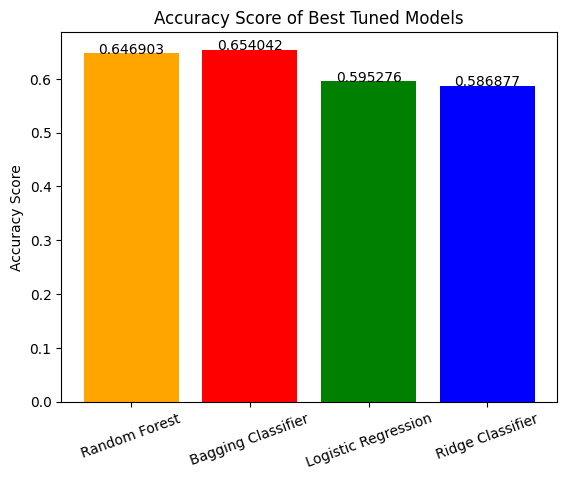

In [3]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

labels = ['Random Forest', 'Bagging Classifier', 'Logistic Regression', 'Ridge Classifier']
score = [0.646903, 0.654042, 0.595276, 0.586877]

plt.figure()
plt.bar(labels, score, color=['orange', 'red', 'green', 'blue'])
plt.xticks(rotation = 20)
addlabels(labels, score)
plt.title("Accuracy Score of Best Tuned Models")
plt.ylabel('Accuracy Score')